## Autoencoder I: ¿Convoluciones? 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Establecer el estilo de Seaborn
sns.set_style("whitegrid")




La convolución es una operación matemática que describe una regla de cómo combinar dos secuencias para obtener una tercera secuencia. Matemáticamente, la convolución de dos funciones $f(t)$ y $g(t)$ se define como:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau
$$

En el contexto de señales discretas (como las señales digitales en un ordenador), la convolución se define como:

$$
(f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] g[n - m]
$$

Donde:
- $f$ y $g$ son las dos señales que queremos convolucionar.
- $\tau$ es una variable de integración.
- $n$ es el índice de la señal discreta.



### Interpretación de la Convolución

La convolución puede interpretarse como el "deslizamiento" de una función sobre otra, invirtiendo una de ellas y desplazándola a lo largo de la otra función. En cada posición, se calcula el área bajo el producto de las dos funciones. Esta área es el valor de la señal convolucionada en ese punto.

### Ejemplo Matemático

Consideremos dos señales discretas simples:

$$ f[n] = \{1, 2, 3\} $$
$$ g[n] = \{0.5, 1\} $$

La convolución $f * g$ se calcula como:

$$ (f * g)[0] = f[0]g[0] + f[1]g[-1] + f[2]g[-2] $$
$$ (f * g)[1] = f[0]g[1] + f[1]g[0] + f[2]g[-1] $$
$$ (f * g)[2] = f[0]g[2] + f[1]g[1] + f[2]g[0] $$
... y así sucesivamente.

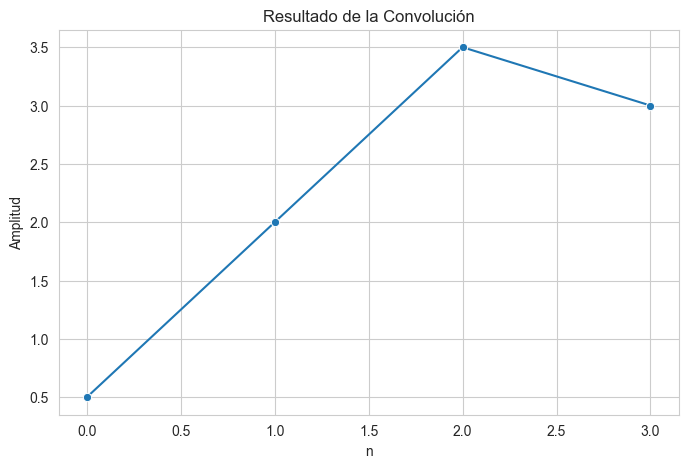

In [13]:
f = np.array([1, 2, 3])
g = np.array([0.5, 1])
resultado = np.convolve(f, g, 'full')

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(len(resultado)), y=resultado, marker="o", dashes=False)
plt.title('Resultado de la Convolución')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.show()


Aquí está el texto corregido utilizando `$` para las ecuaciones en Markdown:

---

### Aplicación Práctica: Efecto de Eco

Para simular un efecto de eco, podemos convolucionar una señal con un impulso retardado y atenuado. Por ejemplo, si tenemos una señal $s[n]$ y queremos un eco que comience después de $D$ muestras y tenga una amplitud de $a$, el eco se puede representar como:

$$ e[n] = \delta[n - D] $$

Donde $\delta[n]$ es el impulso unitario. La señal con eco será:

$$ s_{eco}[n] = s[n] + a \cdot s[n] * e[n] $$

---

Ahora puedes copiar y pegar este contenido en una celda de Markdown en tu Jupyter Notebook y debería renderizarse correctamente.

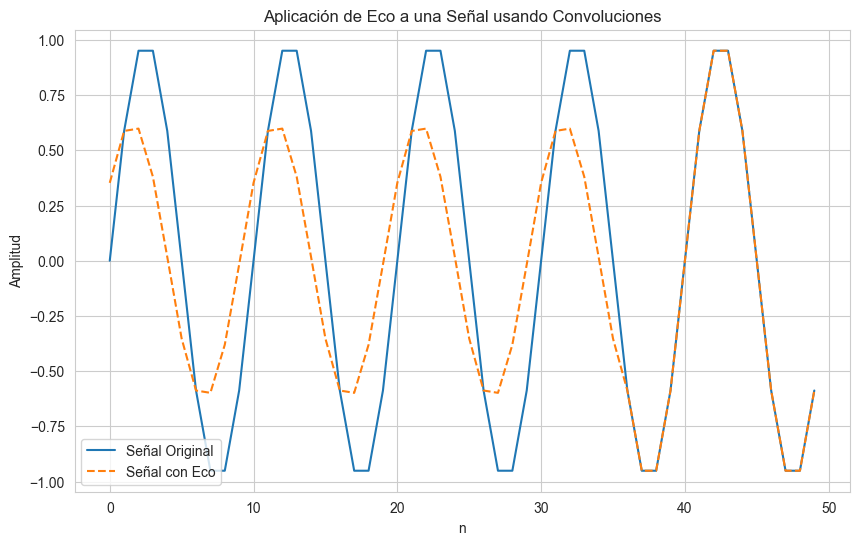

In [14]:
# Señal original
n = np.arange(0, 50)
s = np.sin(0.2 * np.pi * n)

# Eco
D = 10
a = 0.6
e = np.zeros_like(s)
e[D] = a

# Señal con eco
s_eco = s + np.convolve(s, e, 'same')

plt.figure(figsize=(10, 6))
sns.lineplot(x=n, y=s, label='Señal Original')
sns.lineplot(x=n, y=s_eco, label='Señal con Eco', linestyle='dashed')
plt.title('Aplicación de Eco a una Señal usando Convoluciones')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
